In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from torchvision.datasets import ImageFolder
from torchvision import utils, transforms
from torch.utils.data import DataLoader
import torch 

from dotenv import load_dotenv

/tmp/ipykernel_311140/42115266.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

In [3]:
PATH_TO_DOT_ENV = "../src/.env"

# load environment variables from the .env file
load_dotenv(PATH_TO_DOT_ENV)

PROCESSED_DATASET_DIR = ".." + os.environ.get("PROCESSED_DATASET_DIR")
TRAIN_DATASET_ROOT_DIR = PROCESSED_DATASET_DIR + os.environ.get("PROCESSED_DATASET_TRAIN_DIR")

BATCH_SIZE = int(os.environ.get("BATCH_SIZE"))
NUM_WORKERS = int(os.environ.get("NUM_WORKERS"))

In [4]:
data_transforms_only_tensor = transforms.Compose([
        transforms.ToTensor()
])

train_dataset_no_transforms = ImageFolder(
    root = TRAIN_DATASET_ROOT_DIR,
    transform = data_transforms_only_tensor,
)

meta_data_columns = ["width", "height", "channels", "lable"]
meta_data_array = []


for image, lable in train_dataset_no_transforms:
    image_size = image.size()
    image_channels = image_size[0]
    image_width = image_size[1]
    image_height = image_size[2]

    meta_data_array.append([image_width, image_height, image_channels, lable])

meta_data_df = pd.DataFrame(data=meta_data_array, columns=meta_data_columns)
meta_data_df


width  height  channels  lable
0      1050    1050         3      0
1      1536    2048         3      0
2      1958    2588         3      0
3      1050    1050         3      0
4      1050    1050         3      0
...     ...     ...       ...    ...
2924   1958    2588         3      4
2925   1226    1844         3      4
2926   1736    2416         3      4
2927   1736    2416         3      4
2928   1226    1844         3      4

[2929 rows x 4 columns]

array([[<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'channels'}>,
        <Axes: title={'center': 'lable'}>]], dtype=object)

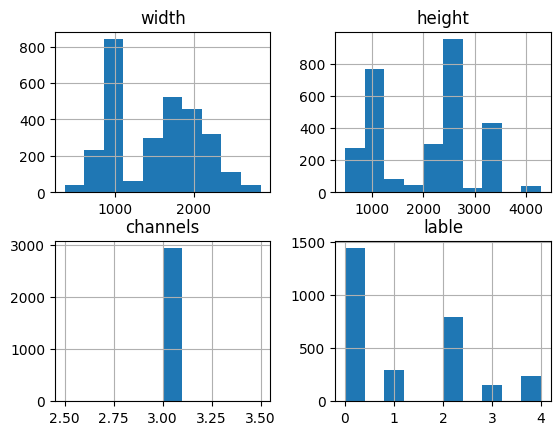

In [5]:
meta_data_df.hist()

/media/mutakabbir/HDD_1TB_0/Carleton/cources/SYSC5301-data-science-for-biomedical-engineering/.venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/media/mutakabbir/HDD_1TB_0/Carleton/cources/SYSC5301-data-science-for-biomedical-engineering/.venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/media/mutakabbir/HDD_1TB_0/Carleton/cources/SYSC5301-data-science-for-biomedical-engineering/.venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


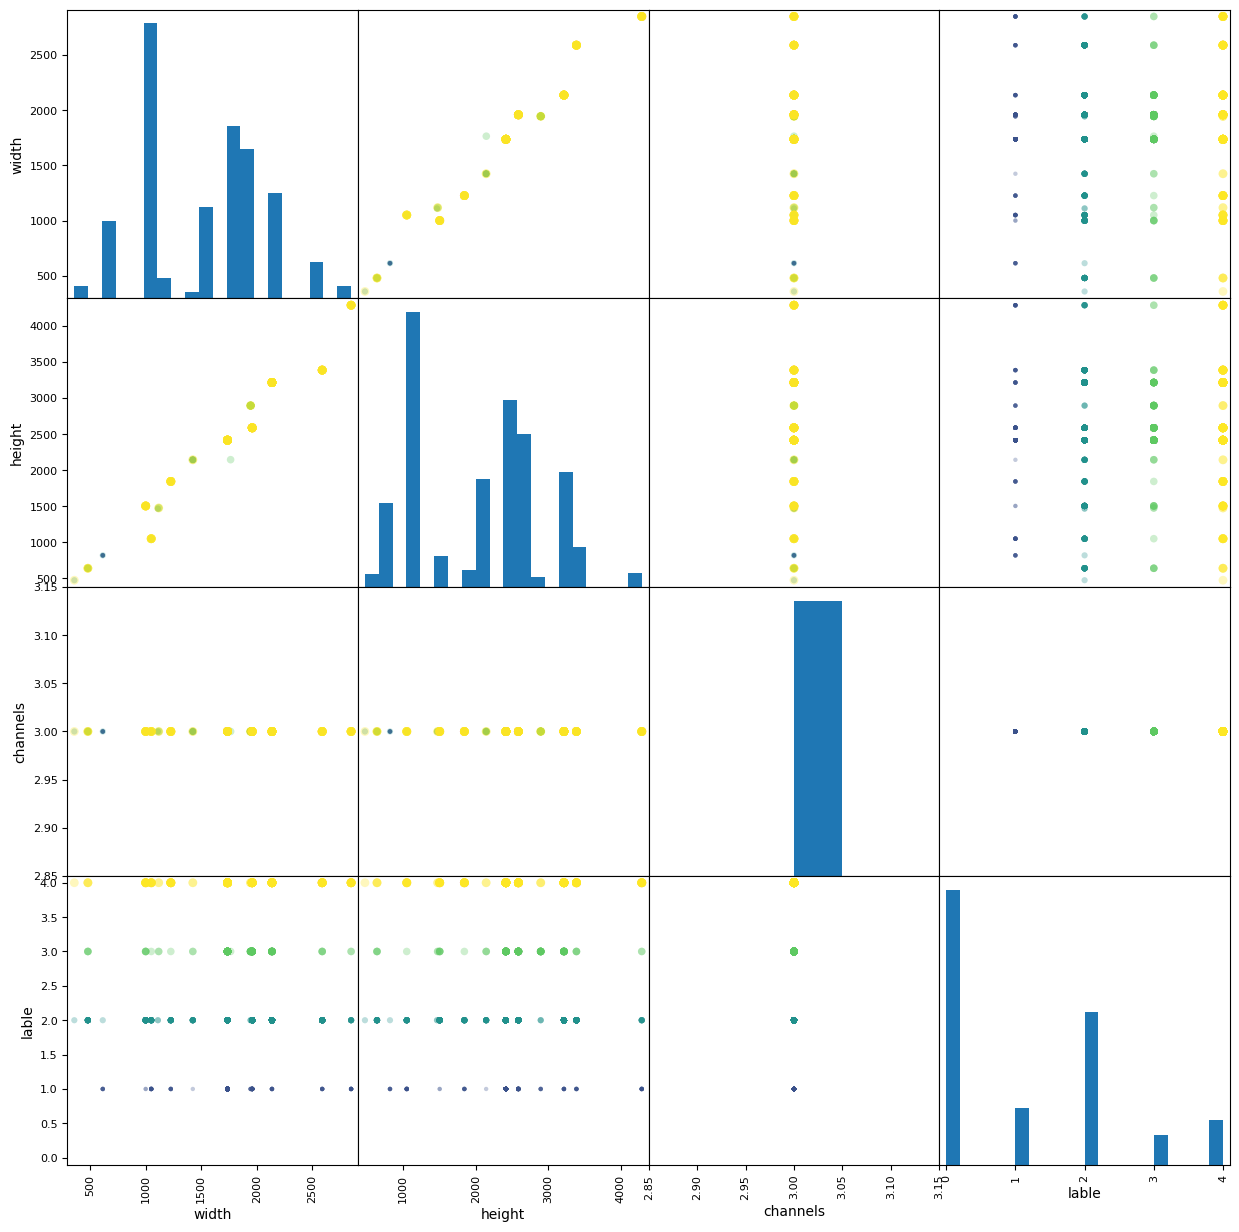

In [6]:
grr = pd.plotting.scatter_matrix(meta_data_df, c=meta_data_df['lable'], figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=meta_data_df['lable']*10, alpha=.3)

In [7]:
meta_data_df.describe()

width       height  channels        lable
count  2929.000000  2929.000000    2929.0  2929.000000
mean   1524.687948  2012.545920       3.0     1.126664
std     541.927298   881.108018       0.0     1.298382
min     358.000000   474.000000       3.0     0.000000
25%    1050.000000  1050.000000       3.0     0.000000
50%    1536.000000  2144.000000       3.0     1.000000
75%    1958.000000  2588.000000       3.0     2.000000
max    2848.000000  4288.000000       3.0     4.000000

In [8]:
# Function to display images
def imshow(img):
    img = img.numpy().transpose((1, 2, 0))
    plt.imshow(img)
    plt.show()

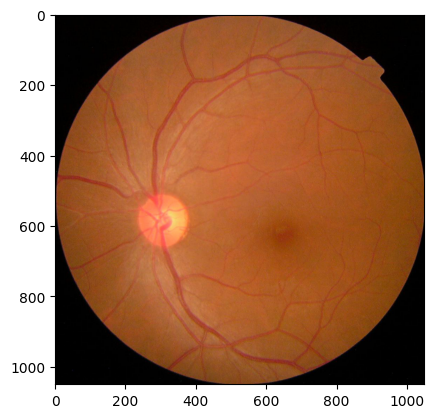

In [9]:
orig_img = train_dataset_no_transforms[0][0]
imshow(orig_img)

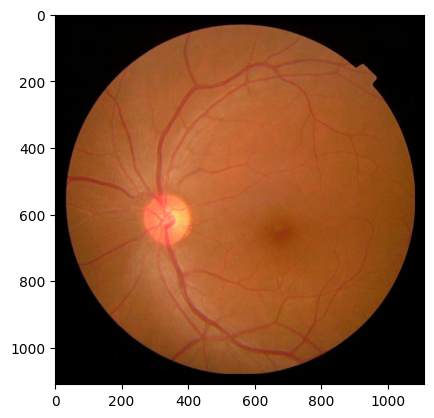

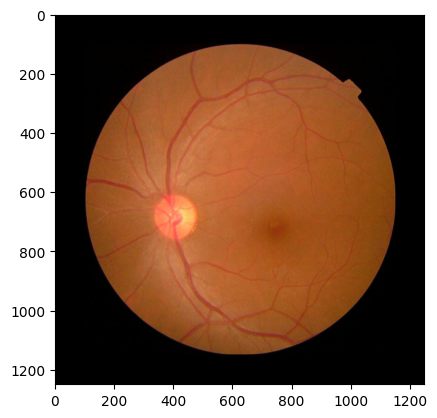

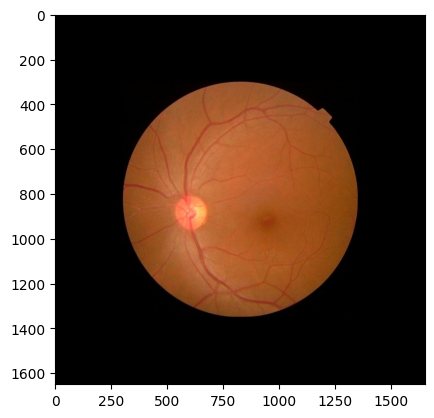

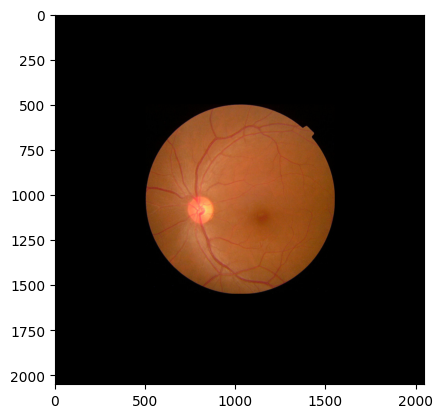

In [10]:
pad_transform = lambda padding: transforms.Pad(padding=padding)
padded_imgs = [imshow(pad_transform(padding)(orig_img)) for padding in (30, 100, 300, 500)]


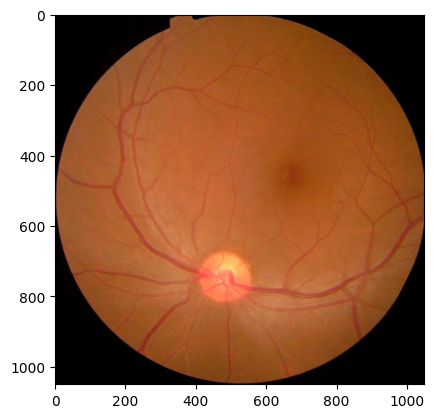

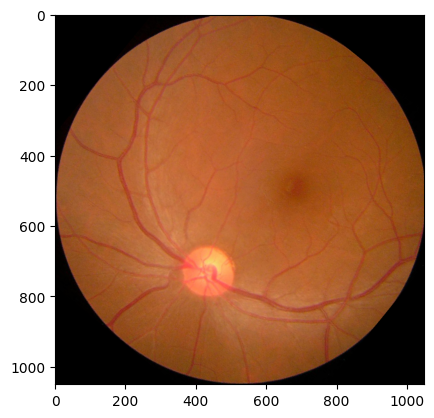

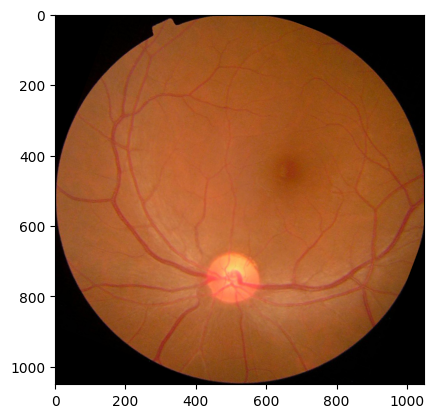

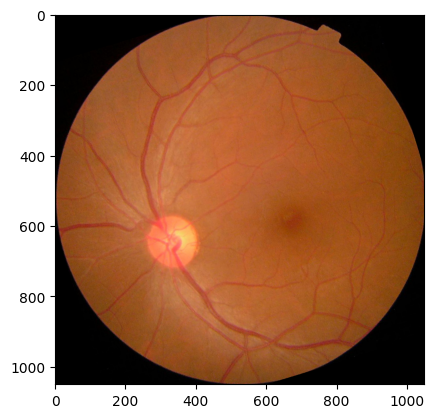

In [11]:
rotater = transforms.RandomRotation(degrees=(0, 90))
rotated_imgs = [imshow(rotater(orig_img)) for _ in range(4)]

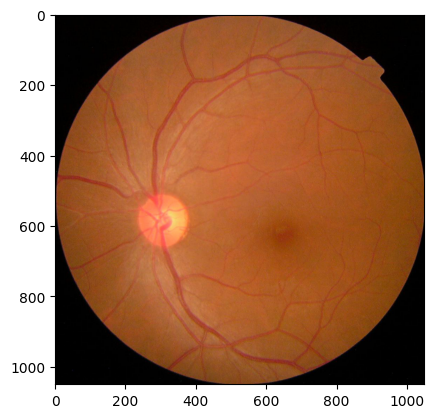

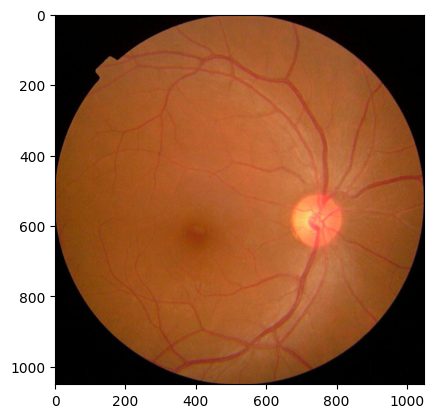

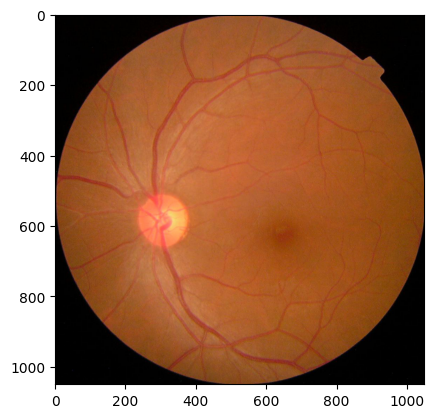

In [12]:
h_flip_imgs = [imshow(transforms.RandomHorizontalFlip(p=0.5)(orig_img)) for _ in range(3)]

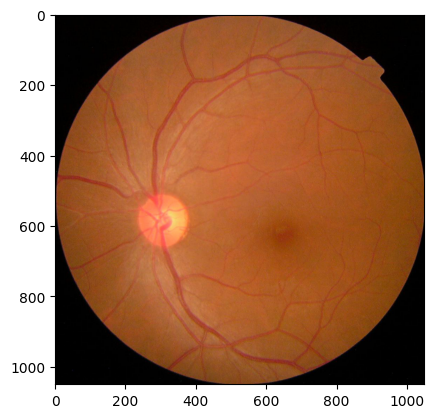

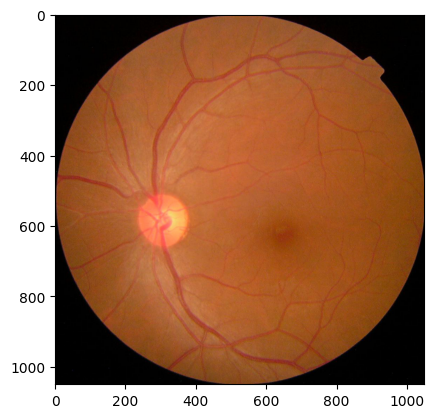

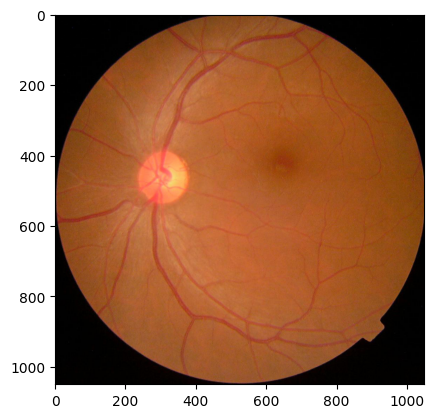

In [13]:
v_flip_imgs = [imshow(transforms.RandomVerticalFlip(p=0.5)(orig_img)) for _ in range(3)]

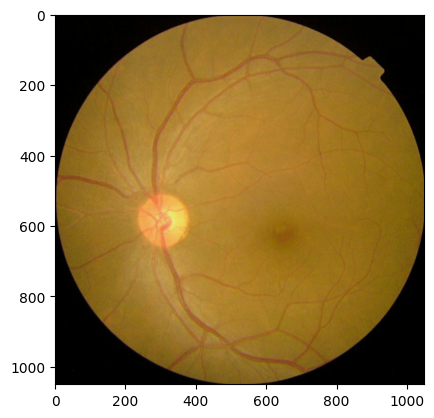

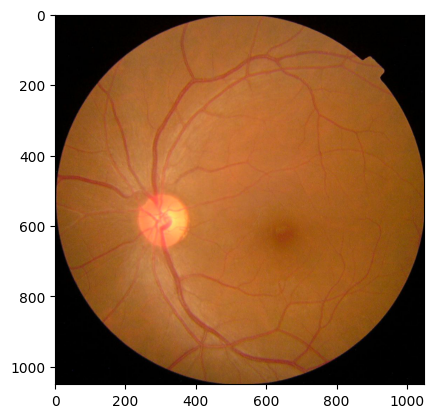

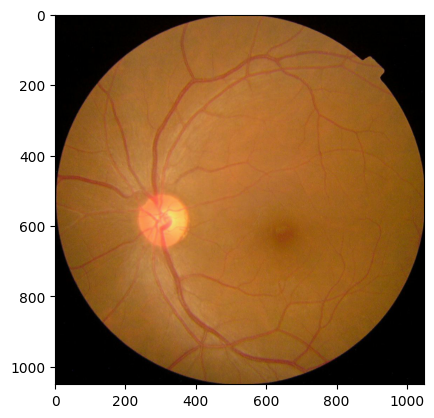

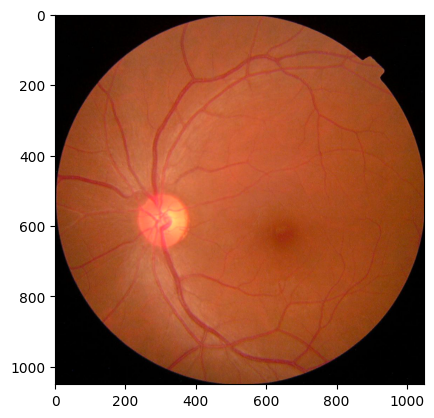

In [14]:
jitter = transforms.ColorJitter(brightness=.05, hue=.05)
jitted_imgs = [imshow(jitter(orig_img)) for _ in range(4)]

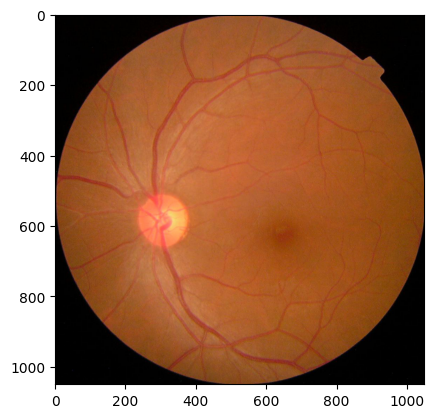

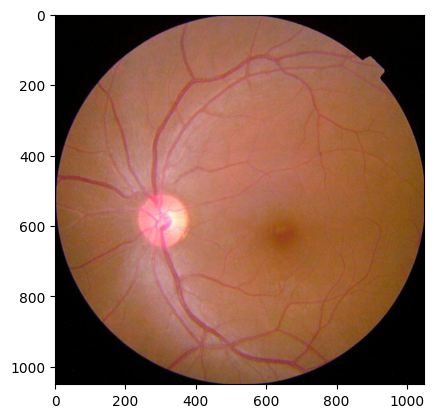

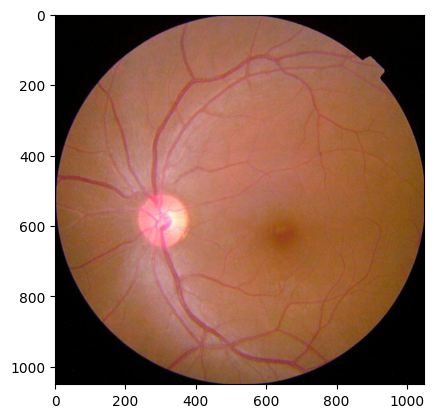

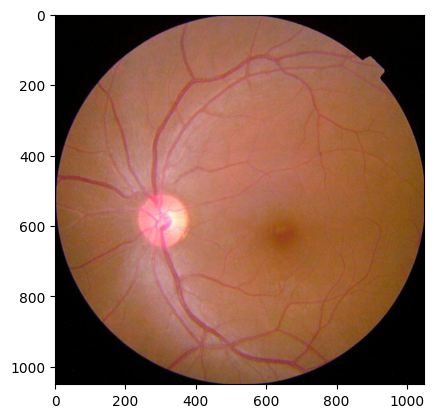

In [15]:
contrast = transforms.RandomAutocontrast(p=.5)
contrast_imgs = [imshow(contrast(orig_img)) for _ in range(4)]

/media/mutakabbir/HDD_1TB_0/Carleton/cources/SYSC5301-data-science-for-biomedical-engineering/.venv/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


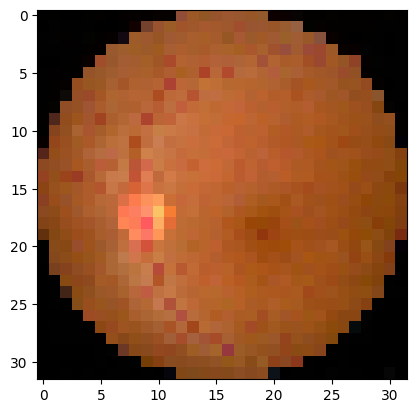

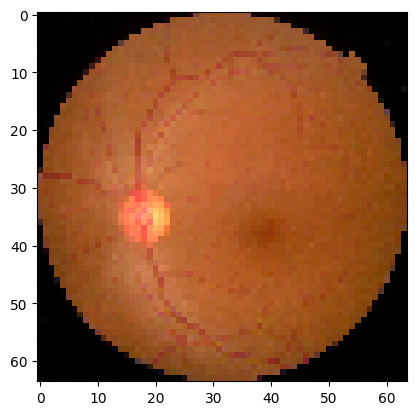

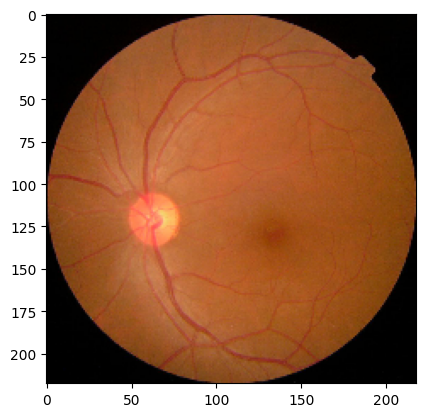

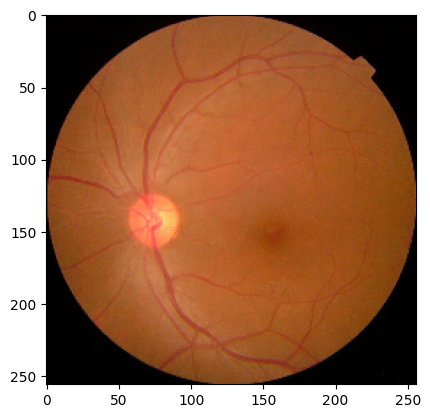

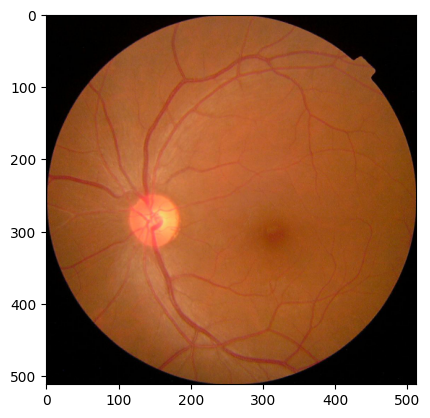

In [16]:
resized_imgs = [imshow(transforms.Resize(size=size)(orig_img)) for size in (32, 64, 218, 256, 512)]

In [17]:
data_transforms = transforms.Compose([
        transforms.Resize(size=(256,256)),
        transforms.RandomRotation(degrees=(0, 90)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ColorJitter(brightness=.05, hue=.05),
        transforms.ToTensor(),
])

train_dataset = ImageFolder(
    root = TRAIN_DATASET_ROOT_DIR,
    transform = data_transforms,
)

train_dataloader = DataLoader(
    train_dataset, 
    batch_size=1, 
    num_workers=NUM_WORKERS,
    shuffle=True, 
)

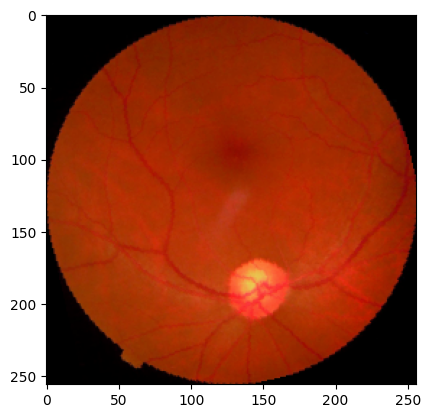

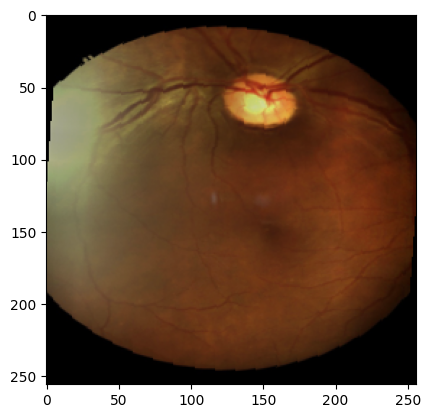

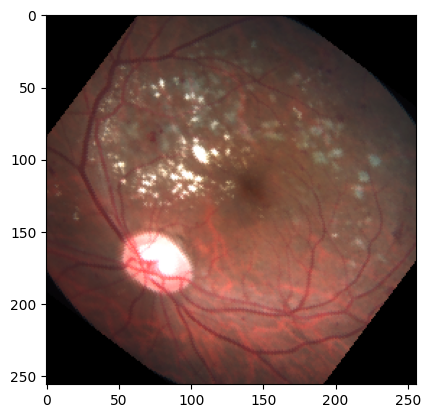

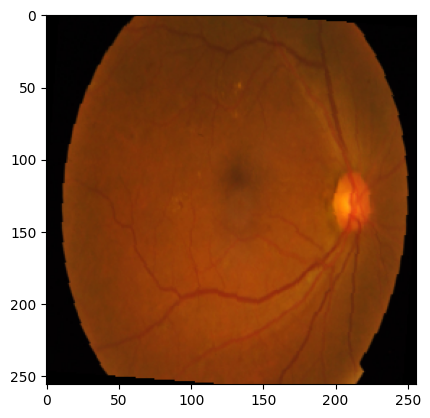

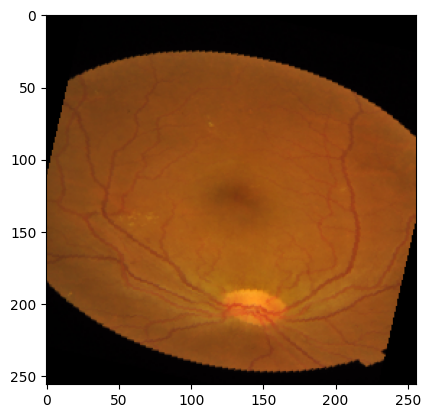

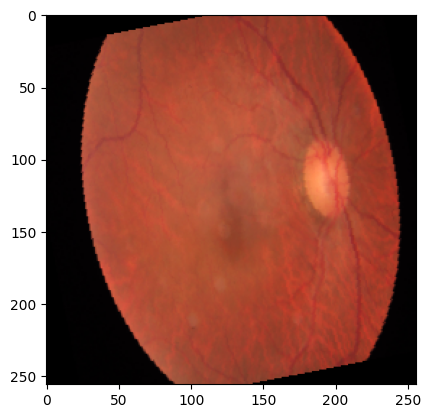

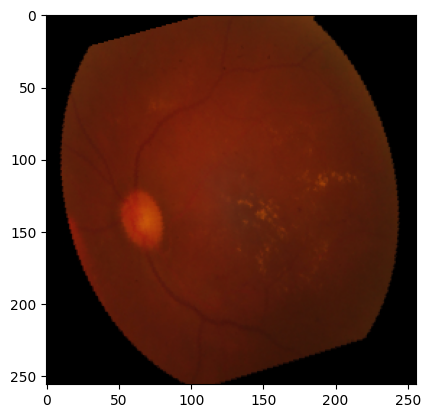

In [18]:
for _index, (img, lable) in enumerate(train_dataloader):
    imshow(torch.squeeze(img))
    if _index == 6:
        break